In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [2]:
train=pd.read_csv('Dataset/Train.csv')
test=pd.read_csv("Dataset/Test.csv")


In [3]:
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
test.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Duration                      125973 non-null  int64  
 1   Protocol_type                 125973 non-null  object 
 2   Service                       125973 non-null  object 
 3   Flag                          125973 non-null  object 
 4   Src_bytes                     125973 non-null  int64  
 5   Dst_bytes                     125973 non-null  int64  
 6   Land                          125973 non-null  int64  
 7   Wrong_fragment                125973 non-null  int64  
 8   Urgent                        125973 non-null  int64  
 9   Hot                           125973 non-null  int64  
 10  Num_failed_logins             125973 non-null  int64  
 11  Logged_in                     125973 non-null  int64  
 12  Num_compromised               125973 non-nul

In [6]:
train.columns,test.columns

(Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
        'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot',
        'Num_failed_logins', 'Logged_in', 'Num_compromised', 'Root_shell',
        'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells',
        'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login',
        'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate',
        'Srv_serror_rate', 'Rerror_rate', 'Srv_error_rate', 'Same_srv_rate',
        'Diff_srv_rate', 'Srv_diff_host_ rate', 'Dst_host_count',
        'Dst_host_srv_count', 'Dst_host_same\n_srv_rate',
        'Dst_host_diff_ srv_rate', 'Dst_host_same _src_port_rate',
        'Dst_host_srv_ diff_host_rate', 'Dst_host_serro r_rate',
        'Dst_host_srv_s error_rate', 'Dst_host_rerro r_rate',
        'Dst_host_srv_r error_rate', 'Result'],
       dtype='object'),
 Index(['Duration', 'Protocol_type', 'Service', 'Flag', 'Src_bytes',
        'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent',

In [7]:
train['Result'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: Result, dtype: int64

In [8]:
train.isnull().sum()

Duration                        0
Protocol_type                   0
Service                         0
Flag                            0
Src_bytes                       0
Dst_bytes                       0
Land                            0
Wrong_fragment                  0
Urgent                          0
Hot                             0
Num_failed_logins               0
Logged_in                       0
Num_compromised                 0
Root_shell                      0
Su_attempted                    0
Num_root                        0
Num_file_creations              0
Num_shells                      0
Num_access_files                0
Num_outbound_cmds               0
Is_hot_login                    0
Is_guest_login                  0
Count                           0
Srv_count                       0
Serror_rate                     0
Srv_serror_rate                 0
Rerror_rate                     0
Srv_error_rate                  0
Same_srv_rate                   0
Diff_srv_rate 

In [9]:
train.replace([np.inf,-np.inf],np.nan,inplace=True)

In [10]:
train.dropna()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [11]:
num_columns=train._get_numeric_data().columns
categorical_columns=list(set(train.columns)-set(num_columns))
categorical_columns.remove('Result')
categorical_columns

['Service', 'Protocol_type', 'Flag']

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['Service']= label_encoder.fit_transform(train['Service'])
train['Service'].unique()


array([20, 44, 49, 24, 51, 36, 38, 14, 35, 60, 18, 12, 58, 67,  2, 54,  7,
       66, 37, 65,  4, 11, 19,  5, 32, 15, 21, 68, 59, 26, 16, 69, 28, 29,
       13, 30, 33, 57, 34, 31, 55, 63, 23, 17, 43, 10, 42,  6,  8, 56,  9,
       53, 40, 47, 41,  0, 46, 48, 62, 45, 50, 39, 52,  1, 64, 27,  3, 25,
       61, 22])

In [13]:
train['Flag']=label_encoder.fit_transform(train['Flag'])
train["Flag"].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [14]:
train['Protocol_type']=label_encoder.fit_transform(train["Protocol_type"])
train['Protocol_type'].unique()

array([1, 2, 0])

In [15]:
train.head()


,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Dst_host_srv_r error_rate,Result
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


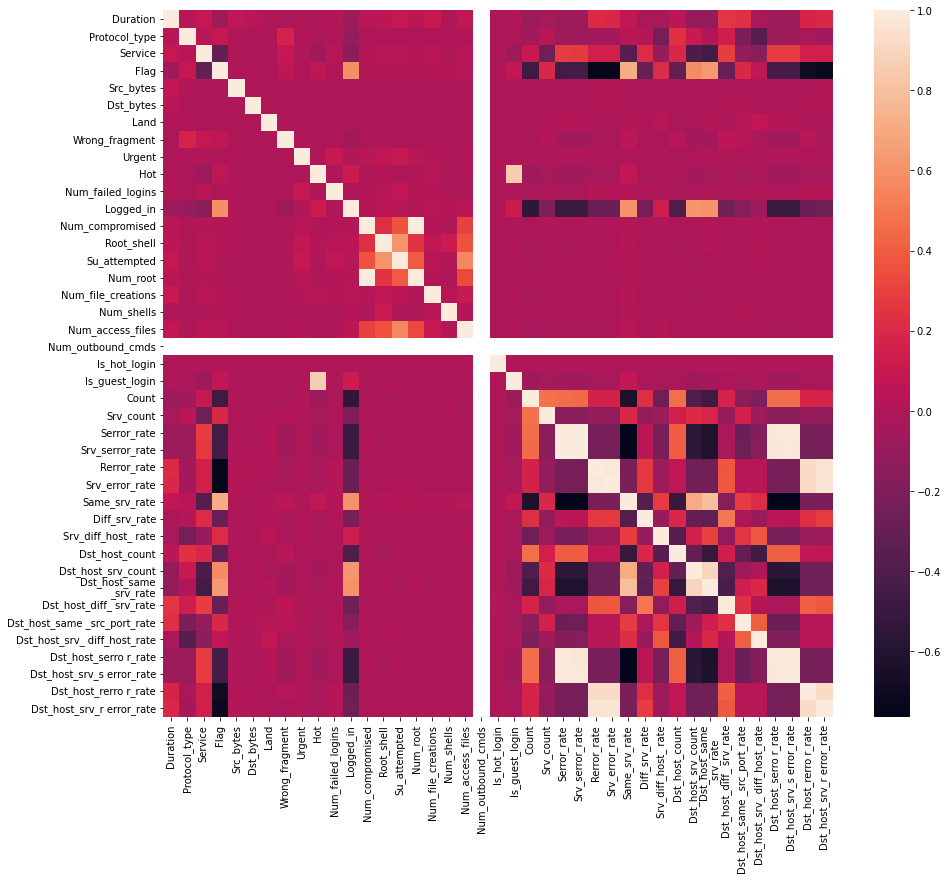

In [16]:
corr=train.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr)
plt.show()

In [17]:
#highly correlated values needs to be neglected,hence
train.drop(['Dst_host_srv_r error_rate'],axis=1, inplace=True)

In [18]:
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_same\n_srv_rate,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Result
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,normal
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,normal
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
train.drop(["Dst_host_same\n_srv_rate"],axis=1,inplace=True)

In [20]:
train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_error_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_ rate,Dst_host_count,Dst_host_srv_count,Dst_host_diff_ srv_rate,Dst_host_same _src_port_rate,Dst_host_srv_ diff_host_rate,Dst_host_serro r_rate,Dst_host_srv_s error_rate,Dst_host_rerro r_rate,Result
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,0.00,0.00,0.05,normal
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,1.00,1.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,0.03,0.01,0.00,normal
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [21]:
predictors=train[train.columns.difference(['Result'])]


In [22]:
X=predictors.values
Y=train.Result






In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [24]:
X_train.shape

(88181, 39)

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [26]:
model=GaussianNB()
a=model.fit(X_train,Y_train)

In [27]:
predicted=model.predict(X_test)

In [28]:
accuracy_score(Y_test,predicted)

0.42440198983911936

In [32]:
a.score(X_train,Y_train)


0.42400290311971967

In [31]:
a.score(X_test,Y_test)

0.42440198983911936

In [ ]:
print(metrics.classification_report(Y_test,predicted,))
confusion_matrix=metrics.confusion_matrix(Y_test,predicted)

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

In [ ]:
FP_rate=FP/(FP+TN)

In [ ]:
FP_rate